<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Machine Learning Landscape

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [2]:
# Memastikan Scikit-Learn versi 0.20 atau lebih tinggi
import sklearn
from packaging import version

if version.parse(sklearn.__version__) < version.parse("0.20"):
    raise Exception("Scikit-Learn versi 0.20 atau lebih baru diperlukan")


In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [5]:
# Agar grafik bisa langsung muncul indah di dalam Jupyter Notebook
%matplotlib inline

import matplotlib as mpl

# Mengatur ukuran font label pada sumbu grafik
mpl.rcParams['axes.labelsize'] = 14

# Mengatur ukuran font pada ticks sumbu x dan y
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12


In [6]:
import os
import urllib.request

# Path tempat menyimpan data
datapath = os.path.join("datasets", "lifesat", "")
os.makedirs(datapath, exist_ok=True)

# URL root untuk data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/lifesat/"

# Daftar file yang akan diunduh
filenames = ["oecd_bli_2015.csv", "gdp_per_capita.csv"]

# Proses pengunduhan tiap file
for filename in filenames:
    print(f"Downloading {filename}...")
    url = DOWNLOAD_ROOT + filename
    destination = os.path.join(datapath, filename)
    urllib.request.urlretrieve(url, destination)
print("Download selesai!")


Download selesai!


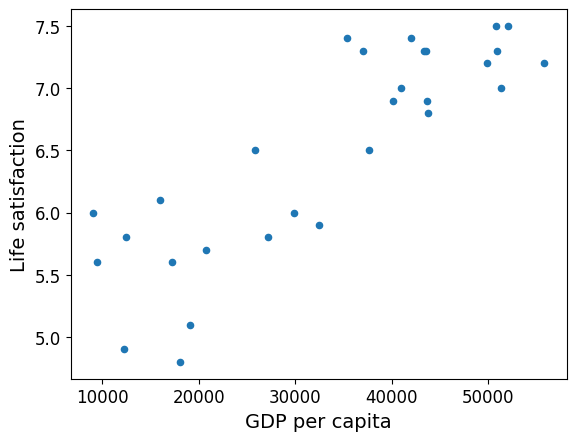

[[5.96242338]]


In [7]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [8]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model1.fit(X,y)

# Make a prediction for Cyprus
print(model1.predict(X_new)) # outputs [[5.76666667]]


[[5.76666667]]


In [10]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [11]:
np.random.seed(42)

In [13]:
# Membaca data OECD BLI dari file CSV, dengan pemisah ribuan berupa koma
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')

# Memfilter baris yang hanya memuat data dengan jenis ketimpangan "TOT" (total inequality)
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]

# Mengubah format data menjadi pivot table:
# - Index adalah "Country" (negara)
# - Kolom adalah "Indicator" (indeks indikator)
# - Nilai dari tabel adalah "Value"
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

# Menampilkan 2 baris pertama data hasil pivot
print(oecd_bli.head(2))



Indicator  Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   

Indicator  Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   

Indicator  Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   
Austria                                 7.61             72.0            0.4   

Indicator  Household net adjusted disposable income  \
Country                                       

In [14]:
oecd_bli["Life satisfaction"].head()

,Life satisfaction
Country,
Australia,7.3
Austria,6.9
Belgium,6.9
Brazil,7.0
Canada,7.3


In [15]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [16]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [18]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]


,United States
GDP per capita,55805.204
Life satisfaction,7.200


In [19]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

Saving figure money_happy_v2_scatterplot


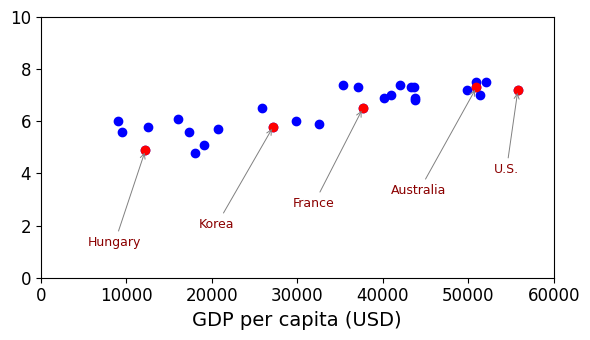

In [21]:
# Plot scatter untuk melihat hubungan antara GDP per kapita dan kepuasan hidup
fig, ax = plt.subplots(figsize=(6, 3.5))
ax.scatter(sample_data["GDP per capita"], sample_data["Life satisfaction"], color='blue')

# Mengatur batas axis supaya plot fokus di rentang yang diinginkan
ax.set_xlim(0, 60000)
ax.set_ylim(0, 10)

# Dictionary posisi label teks untuk beberapa negara tertentu
label_positions = {
    "Hungary": (5500, 1.2),
    "Korea": (18500, 1.9),
    "France": (29500, 2.7),
    "Australia": (41000, 3.2),
    "United States": (53000, 4.0),
}

# Memberi label pada setiap negara dengan panah yang mengarah ke titik data
for nation, (text_x, text_y) in label_positions.items():
    x_val, y_val = sample_data.loc[nation]
    # Gunakan singkatan untuk USA
    name_to_show = "U.S." if nation == "United States" else nation

    # Tambahkan anotasi panah ke lokasi titik data
    ax.annotate(
        name_to_show,
        xy=(x_val, y_val),
        xytext=(text_x, text_y),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=0.7),
        fontsize=9,
        color='darkred'
    )
    # Tandai titik dengan lingkaran merah
    ax.plot(x_val, y_val, 'ro')

# Label sumbu X
ax.set_xlabel("GDP per capita (USD)")

# Menyimpan gambar dengan fungsi save_fig yang sudah Anda definisikan
save_fig('money_happy_v2_scatterplot')

# Tampilkan plot
plt.show()


In [22]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [25]:
# Ambil subset data untuk negara yang di-highlight di plot
selected_countries = list(position_text.keys())
highlighted_data = sample_data.loc[selected_countries]
print(highlighted_data)



               GDP per capita  Life satisfaction
Country                                         
Hungary             12239.894                4.9
Korea               27195.197                5.8
France              37675.006                6.5
Australia           50961.865                7.3
United States       55805.204                7.2


Saving figure tweaking_model_params_plot_v2


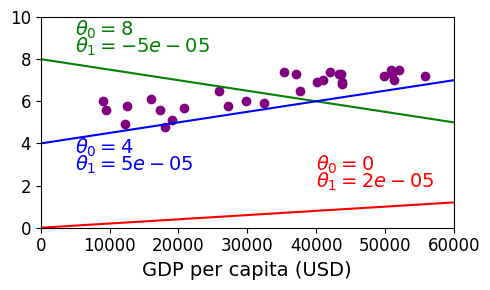

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Asumsi: sample_data sudah ada sebagai DataFrame dengan kolom 'GDP per capita' dan 'Life satisfaction'
data = sample_data.copy()

fig, ax = plt.subplots(figsize=(5, 3))

# Scatter plot GDP per capita vs Life satisfaction dengan warna ungu
ax.scatter(data["GDP per capita"], data["Life satisfaction"], color='purple')

# Label axis X
ax.set_xlabel("GDP per capita (USD)")

# Mengatur batas axis
ax.axis([0, 60000, 0, 10])

# Membuat range X untuk plot model garis linear
x_vals = np.linspace(0, 60000, 1000)

# Definisi parameter theta dan warna untuk tiap garis model
model_params = [
    {'intercept': 0, 'slope': 2e-5, 'clr': 'red', 'text_pos': (40000, 2.7)},
    {'intercept': 8, 'slope': -5e-5, 'clr': 'green', 'text_pos': (5000, 9.1)},
    {'intercept': 4, 'slope': 5e-5, 'clr': 'blue', 'text_pos': (5000, 3.5)},
]

# Looping untuk menggambar garis dan menambahkan teks keterangan parameter
for param in model_params:
    y_vals = param['intercept'] + param['slope'] * x_vals
    ax.plot(x_vals, y_vals, color=param['clr'])
    ax.text(param['text_pos'][0], param['text_pos'][1], fr"$\theta_0 = {param['intercept']}$", fontsize=14, color=param['clr'])
    ax.text(param['text_pos'][0], param['text_pos'][1] - 0.8, fr"$\theta_1 = {param['slope']:.0e}$", fontsize=14, color=param['clr'])

# Simpan figur dengan nama berbeda agar tidak tumpang tindih file lama
save_fig('tweaking_model_params_plot_v2')

plt.show()


Saving figure best_fit_model_plot_v2


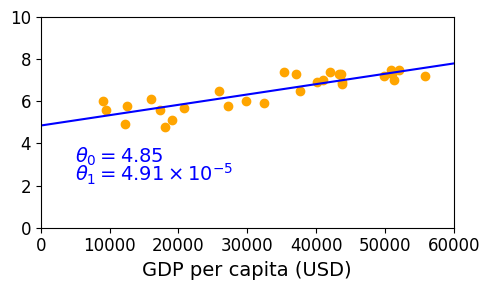

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Copy data untuk manipulasi, asumsikan sample_data sudah tersedia
df = sample_data.copy()

fig, ax = plt.subplots(figsize=(5, 3))

# Plot scatter GDP per kapita dan Life satisfaction dengan warna oranye
ax.scatter(df["GDP per capita"], df["Life satisfaction"], color='orange')

# Label untuk sumbu x
ax.set_xlabel("GDP per capita (USD)")

# Mengatur batas axis x dan y
ax.axis([0, 60000, 0, 10])

# Membuat array nilai X untuk plot garis linear model terbaik
x_range = np.linspace(0, 60000, 1000)

# Parameter theta untuk garis linear terbaik
intercept_best = 4.85
slope_best = 4.91e-5

# Plot garis linear dengan color biru
ax.plot(x_range, intercept_best + slope_best * x_range, color='blue')

# Menambahkan keterangan parameter theta di plot
ax.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="blue")
ax.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="blue")

# Simpan gambar dengan nama berbeda
save_fig('best_fit_model_plot_v2')

plt.show()


In [29]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
print(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0][0]
cyprus_predicted_life_satisfaction

22587.49


np.float64(5.96244744318815)

Saving figure cyprus_prediction_plot


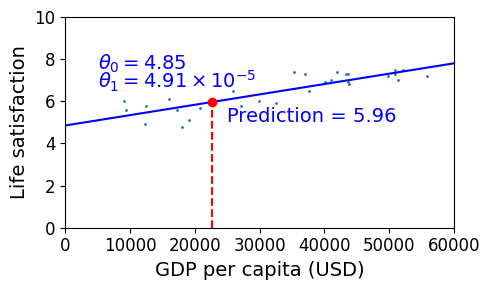

In [30]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
plt.xlabel("GDP per capita (USD)")
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

Saving figure cyprus_prediction_plot_v2


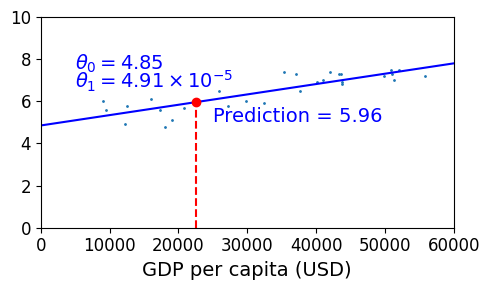

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Asumsi data tersedia di sample_data DataFrame
df_copy = sample_data.copy()

fig, axes = plt.subplots(figsize=(5, 3))

# Scatter plot GDP per kapita vs Life satisfaction dengan ukuran titik kecil
axes.scatter(df_copy["GDP per capita"], df_copy["Life satisfaction"], s=1)

# Label sumbu X
axes.set_xlabel("GDP per capita (USD)")

# Mengatur batas axis
axes.axis([0, 60000, 0, 10])

# Membuat X range untuk plot garis model linear terbaik
x_vals = np.linspace(0, 60000, 1000)

# Parameter model (intercept dan slope)
intercept = t0  # asumsi sudah terdefinisi
slope = t1      # asumsi sudah terdefinisi

# Plot garis model linear dengan warna biru
axes.plot(x_vals, intercept + slope * x_vals, "b")

# Menambahkan teks parameter theta pada plot
axes.text(5000, 7.5, r"$\theta_0 = 4.85$", fontsize=14, color="b")
axes.text(5000, 6.6, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")

# Menandai prediksi untuk Cyprus dengan garis putus-putus merah
axes.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")

# Menambah teks prediksi nilai untuk Cyprus
axes.text(25000, 5.0, r"Prediction = 5.96", fontsize=14, color="b")

# Menandai titik prediksi dengan lingkaran merah
axes.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

# Simpan figur dengan nama berbeda untuk menghindari overwrite
save_fig('cyprus_prediction_plot_v2')

plt.show()


In [32]:
sample_data[1:10]

,GDP per capita,Life satisfaction
Country,,
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7
Spain,25864.721,6.5


In [36]:
def extract_and_prepare_stats(oecd_df, gdp_df):
    # Filter data OECD hanya untuk kategori total ketimpangan
    filtered_oecd = oecd_df.query('INEQUALITY == "TOT"')

    # Pivot data untuk menjadikan indikator sebagai kolom
    pivot_oecd = filtered_oecd.pivot(index="Country", columns="Indicator", values="Value")

    # Rename kolom tahun 2015 menjadi 'GDP per capita'
    gdp_df_renamed = gdp_df.rename(columns={"2015": "GDP per capita"})

    # Set index menjadi 'Country'
    gdp_df_renamed.set_index("Country", inplace=True)

    # Merge dataset OECD dengan GDP melalui index 'Country'
    merged_data = pivot_oecd.merge(gdp_df_renamed, left_index=True, right_index=True)

    # Sort data berdasarkan GDP per kapita secara ascending
    merged_sorted = merged_data.sort_values("GDP per capita")

    # Tentukan indeks yang dihapus dari data
    to_remove = {0, 1, 6, 8, 33, 34, 35}

    # Buat list indeks yang akan diambil
    to_keep = [i for i in range(36) if i not in to_remove]

    # Return data subset dengan kolom GDP dan Life satisfaction
    return merged_sorted.loc[to_keep, ["GDP per capita", "Life satisfaction"]]


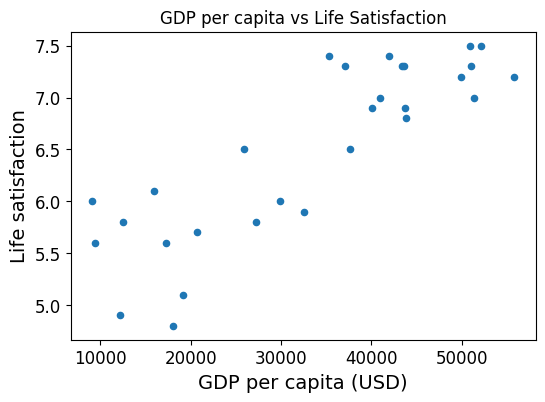

Prediksi kepuasan hidup untuk Cyprus dengan GDP per kapita 22587 adalah 5.9624


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset (asumsi variabel datapath sudah ada)
oecd_bli_df = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_df = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t',
                     encoding='latin1', na_values="n/a")

def prepare_stats(oecd_data, gdp_data):
    # Filter data OECD untuk kategori total inequality
    filtered_oecd = oecd_data[oecd_data["INEQUALITY"] == "TOT"]
    # Pivot agar indikator menjadi kolom
    pivoted_oecd = filtered_oecd.pivot(index="Country", columns="Indicator", values="Value")
    # Rename kolom tahun 2015 jadi GDP per capita
    gdp_data_renamed = gdp_data.rename(columns={"2015": "GDP per capita"})
    gdp_data_renamed.set_index("Country", inplace=True)
    # Gabungkan data OECD dan GDP
    combined = pd.merge(pivoted_oecd, gdp_data_renamed, left_index=True, right_index=True)
    # Urutkan berdasarkan GDP per capita
    combined = combined.sort_values("GDP per capita")
    # Indeks yang akan dihapus
    excluded_indices = {0, 1, 6, 8, 33, 34, 35}
    included_indices = [idx for idx in range(36) if idx not in excluded_indices]
    # Use iloc for integer-based indexing
    return combined.iloc[included_indices, combined.columns.get_indexer(["GDP per capita", "Life satisfaction"])]

# Siapkan data
country_stats = prepare_stats(oecd_bli_df, gdp_df)
X = np.array(country_stats["GDP per capita"]).reshape(-1, 1)
y = np.array(country_stats["Life satisfaction"]).reshape(-1, 1)

# Scatter plot data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(6,4))
plt.title("GDP per capita vs Life Satisfaction")
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.show()

# Pilih model regresi linear
linear_model = LinearRegression()

# Latih model
linear_model.fit(X, y)

# Prediksi untuk Cyprus (contoh GDP per kapita)
cyprus_gdp = [[22587]]
prediksi_cyprus = linear_model.predict(cyprus_gdp)
print(f"Prediksi kepuasan hidup untuk Cyprus dengan GDP per kapita {cyprus_gdp[0][0]} adalah {prediksi_cyprus[0][0]:.4f}")

In [41]:
oecd_bli, gdp_per_capita = backup

In [42]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


In [43]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving figure representative_training_data_scatterplot


<Figure size 800x300 with 0 Axes>

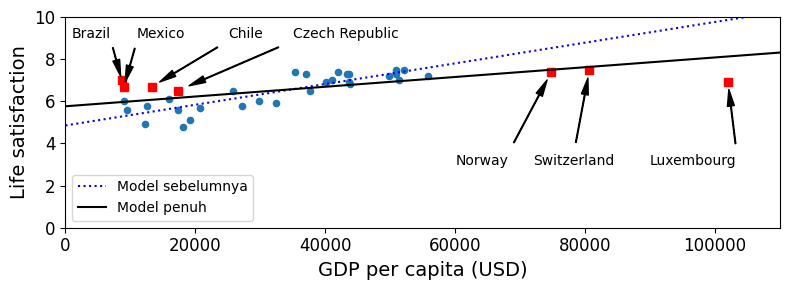

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Asumsi sample_data, position_text2, missing_data, full_country_stats, t0, t1 sudah ada sebelumnya

plt.figure(figsize=(8, 3))

# Scatter plot GDP per capita terhadap Life satisfaction
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8, 3))

# Atur batas axis agar sama dengan kode Anda
plt.axis([0, 110000, 0, 10])

# Anotasi negara yang ada di position_text2 dengan panah dan titik merah
for negara, posisi_teks in position_text2.items():
    x_data, y_data = missing_data.loc[negara]
    plt.annotate(negara, xy=(x_data, y_data), xytext=posisi_teks,
                 arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(x_data, y_data, "rs")

# Buat array X untuk garis prediksi (dari t0 dan t1)
X_vals = np.linspace(0, 110000, 1000)
plt.plot(X_vals, t0 + t1 * X_vals, "b:", label="Model sebelumnya")

# Membuat objek model regresi linear dan melatihnya dengan data lengkap
lin_reg_full = LinearRegression()
X_full = np.c_[full_country_stats["GDP per capita"]]
y_full = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(X_full, y_full)

# Mengambil koefisien dan intercept dari model penuh
intercept_full, slope_full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

# Plot garis regresi linear model penuh dengan warna hitam solid
plt.plot(X_vals, intercept_full + slope_full * X_vals, "k-", label="Model penuh")

# Label sumbu X
plt.xlabel("GDP per capita (USD)")

# Tambahkan legend untuk membedakan garis model
plt.legend()

# Jika Anda ingin menyimpan gambar, pastikan fungsi save_fig sudah didefinisikan sebelumnya
save_fig('representative_training_data_scatterplot')

# Tampilkan plot
plt.show()


Saving figure overfitting_model_plot


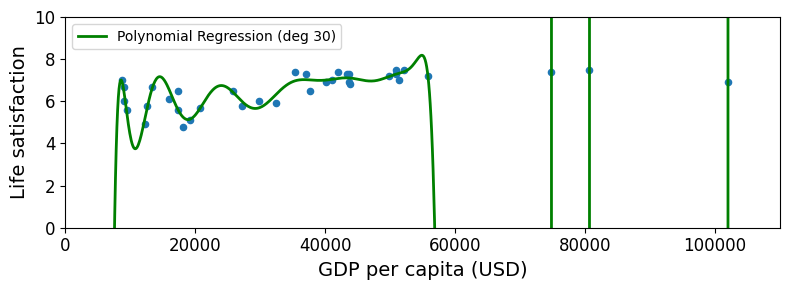

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Asumsi full_country_stats sudah ada dan berisi data lengkap
# Scatter plot: GDP per capita vs Life satisfaction
full_country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction", figsize=(8, 3))
plt.axis([0, 110000, 0, 10])

# Siapkan data X dan y dari full_country_stats
X_full = np.array(full_country_stats["GDP per capita"]).reshape(-1, 1)
y_full = np.array(full_country_stats["Life satisfaction"]).reshape(-1, 1)

# Buat pipeline polynomial regression derajat 30 dengan scaling
poly_features = PolynomialFeatures(degree=30, include_bias=False)
scaler = StandardScaler()
linear_regression = LinearRegression()

pipeline_reg = Pipeline([
    ('poly', poly_features),
    ('scaler', scaler),
    ('lin_reg', linear_regression)
])

# Latih pipeline dengan data lengkap
pipeline_reg.fit(X_full, y_full)

# Buat array X yang halus untuk plot kurva hasil prediksi
X_plot = np.linspace(0, 110000, 1000).reshape(-1, 1)
y_plot = pipeline_reg.predict(X_plot)

# Plot kurva hasil prediksi polynomial regression
plt.plot(X_plot, y_plot, color="green", linewidth=2, label="Polynomial Regression (deg 30)")

# Label sumbu X
plt.xlabel("GDP per capita (USD)")

# Tambahkan legend untuk memperjelas plot
plt.legend()

# Simpan gambar (pastikan fungsi save_fig sudah tersedia)
save_fig('overfitting_model_plot')

plt.show()


In [46]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

,Life satisfaction
Country,
New Zealand,7.3
Sweden,7.2
Norway,7.4
Switzerland,7.5


In [47]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Botswana,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",6040.957,2008.0
Kuwait,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",29363.027,2014.0
Malawi,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",354.275,2011.0
New Zealand,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",37044.891,2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",74822.106,2015.0


In [51]:
# Combine sample_data and missing_data to train the model on all data
all_data = pd.concat([sample_data, missing_data])

# Prepare data for the linear regression model
X_all = np.c_[all_data["GDP per capita"]]
y_all = np.c_[all_data["Life satisfaction"]]

# Create and train the linear regression model on all data
lin_reg_all = LinearRegression()
lin_reg_all.fit(X_all, y_all)

# Get the intercept and slope
t0full, t1full = lin_reg_all.intercept_[0], lin_reg_all.coef_[0][0]

print(f"Intercept (t0full): {t0full:.4f}")
print(f"Slope (t1full): {t1full:.4f}")

Intercept (t0full): 5.7630
Slope (t1full): 0.0000


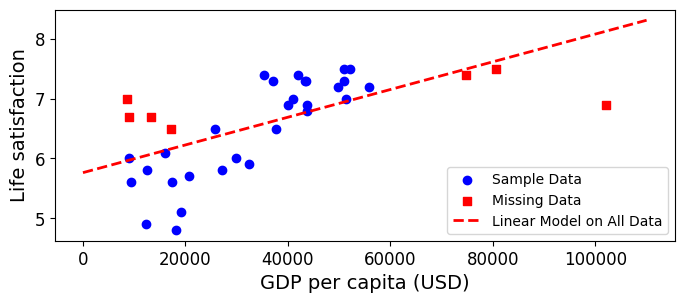

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

# Asumsi data sample_data dan missing_data sudah ada sebelumnya
# dan t0full, t1full, t0, t1 sudah terdefinisi sebagai parameter model linear

plt.figure(figsize=(8, 3))

# Label sumbu
plt.xlabel("GDP per capita (USD)")
plt.ylabel('Life satisfaction')

# Scatter plot point biru untuk sample_data
plt.scatter(sample_data["GDP per capita"], sample_data["Life satisfaction"], color='blue', marker='o', label='Sample Data')

# Scatter plot point merah kotak untuk missing_data
plt.scatter(missing_data["GDP per capita"], missing_data["Life satisfaction"], color='red', marker='s', label='Missing Data')

# Buat range X untuk plotting garis model
X_range = np.linspace(0, 110000, 1000)

# Plot garis linear model pada seluruh data (garis merah putus-putus)
plt.plot(X_range, t0full + t1full * X_range, 'r--', linewidth=2, label="Linear Model on All Data") # Fixed: added closing quote

# Add legends
plt.legend()

# Show the plot
plt.show()

## ✍️ Penjelasan Teori Machine Learning dan Cara Menulis Rumus LaTeX di Notebook (Mulai Dari Awal)

---

### 🎯 1. Definisi dan Tujuan Machine Learning  
Machine Learning adalah cabang ilmu yang fokus pada pengembangan algoritma yang mampu belajar dari data dan memberikan prediksi atau keputusan tanpa perlu diprogram secara eksplisit. Tujuannya adalah untuk memodelkan fungsi \( f \) atau mengenali pola dari data yang tersedia.

Terdapat tiga jenis pembelajaran utama:  
- **Supervised Learning**: Algoritma belajar dari data berlabel untuk memprediksi output baru.  
- **Unsupervised Learning**: Algoritma menemukan pola dari data tanpa label.  
- **Reinforcement Learning**: Agen belajar mengambil tindakan untuk memaksimalkan imbalan melalui interaksi dengan lingkungan.

---

### 🧩 2. Elemen Utama Sistem Machine Learning  
- **Dataset**: Kumpulan data yang terdiri dari fitur dan kadang label.  
- **Model**: Representasi matematis dengan parameter \(\theta\) untuk fungsi prediksi.  
- **Algoritma Pembelajaran**: Metode optimasi parameter model, seperti gradient descent.  
- **Fungsi Biaya (Loss Function)**: Ukuran kesalahan prediksi model, misalnya Mean Squared Error (MSE).  
- **Algoritma Optimasi**: Cara meminimalkan fungsi biaya demi hasil terbaik.

---

### ⚖️ 3. Masalah Overfitting dan Underfitting  

- **Underfitting**: Model terlalu sederhana sehingga gagal menangkap pola data (high bias).  
- **Overfitting**: Model terlalu kompleks, sangat fit dengan data latih tapi buruk pada data baru (high variance).

Trade-off bias-varian dapat dirumuskan secara matematis sebagai berikut:

$$
\text{Error}_{\text{total}} = \underbrace{\text{Bias}^2}_{\text{kesalahan akibat simplifikasi}} + \underbrace{\text{Variance}}_{\text{sensitivitas terhadap data}} + \underbrace{\text{Noise}}_{\text{gangguan tak terprediksi}}
$$


---

### 📌 Penjelasan Komponen Rumus:  
- **Bias**: Kesalahan rata-rata model dibandingkan dengan kebenaran sebenarnya (simplifikasi model).  
- **Variance**: Seberapa sensitif output model terhadap variasi data pelatihan yang digunakan.  
- **Noise**: Ketidakteraturan alami pada data yang tidak dapat diprediksi oleh model.

---

### 📊 4. Evaluasi Model  

Metrik evaluasi yang umum digunakan untuk regresi adalah Mean Squared Error (MSE) yang dirumuskan sebagai:


$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^m \left(\hat{y}^{(i)} - y^{(i)}\right)^2
$$


atau Root Mean Squared Error (RMSE):


$$
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^m \left(\hat{y}^{(i)} - y^{(i)}\right)^2}
$$


## 📚 Jawaban Exercise Machine Learning


---

### 1. How would you define Machine Learning?

Machine Learning adalah cabang ilmu komputer yang memungkinkan sistem (komputer atau mesin) untuk “belajar” dari data atau pengalaman tanpa diprogram secara eksplisit untuk setiap tugas.

---

### 2. Can you name four types of problems where it shines?

1. **Klasifikasi (Classification)**: Menentukan kategori atau label dari data baru berdasarkan data berlabel sebelumnya.  
   _Contoh_: Mendeteksi email spam vs. bukan spam.

2. **Regresi (Regression)**: Memprediksi nilai numerik kontinu.  
   _Contoh_: Memprediksi harga rumah.

3. **Clustering (Pengelompokan)/Segmentasi**: Mengelompokkan data tanpa label ke dalam beberapa kelompok berdasarkan kemiripan.  
   _Contoh_: Segmentasi pelanggan.

4. **Deteksi Anomali (Anomaly Detection)**: Mendeteksi data yang menyimpang jauh dari pola umum.  
   _Contoh_: Mendeteksi transaksi kartu kredit mencurigakan.

---

### 3. What is a labeled training set?

Labeled training set adalah kumpulan data di mana setiap contoh sudah dilengkapi dengan label atau target yang benar, yang dipakai sebagai acuan saat pelatihan model.

---

### 4. What are the two most common supervised tasks?

1. **Klasifikasi:** Pemodelan untuk memetakan input ke kategori diskrit (contoh: spam atau bukan spam).  
2. **Regresi:** Memprediksi nilai kontinu (contoh: harga properti).

---

### 5. Can you name four common unsupervised tasks?

1. Clustering (Pengelompokan)  
2. Reduksi Dimensi (misal PCA, t-SNE)  
3. Association Rule Learning (Penambangan asosiasi, contoh: Apriori)  
4. Deteksi Anomali tanpa label (contoh: Isolation Forest)

---

### 6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?

Penggunaan **Reinforcement Learning (RL)** karena melibatkan pembelajaran melalui interaksi dan umpan balik lingkungan.

---

### 7. What type of algorithm would you use to segment your customers into multiple groups?

Gunakan algoritma **Clustering** untuk mengelompokkan pelanggan berdasarkan kemiripan fitur.

---

### 8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

Biasanya **Supervised Learning**, karena ada data email yang sudah berlabel spam dan bukan spam.

---

### 9. What is an online learning system?

Model yang diperbarui secara bertahap setiap kali data baru datang tanpa perlu pelatihan ulang dari awal.

---

### 10. What is out-of-core learning?

Metode belajar saat data terlalu besar untuk muat seluruhnya di RAM, sehingga diproses secara bertahap dari disk.

---

### 11. What type of learning algorithm relies on a similarity measure to make predictions?

**Instance-based learning** atau **lazy learning**, contohnya algoritma K-Nearest Neighbors (KNN).

---

### 12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?

- **Parameter model:** Variabel internal yang dipelajari dari data saat training.  
- **Hyperparameter:** Pengaturan luar yang ditentukan sebelum training dan tidak diubah otomatis oleh algoritma.

---

### 13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?

Model-based learning mencari fungsi representasi terbaik antara fitur dan target. Strateginya umumnya dengan optimasi fungsi objektif (misalnya loss function) melalui teknik seperti gradient descent. Setelah training, prediksi dibuat dengan memasukkan input ke model.

---

### 14. Can you name four of the main challenges in Machine Learning?

1. Kualitas dan kuantitas data  
2. Overfitting dan underfitting  
3. Pemilihan fitur  
4. Distribusi data yang berubah

---

### 15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?

Model mengalami **overfitting**. Solusinya:  
1. Regularisasi  
2. Kurangi kompleksitas model  
3. Tambah data latih

---

### 16. What is a test set, and why would you want to use it?

Test set adalah data yang tidak dipakai saat training atau tuning, berguna untuk mengevaluasi kemampuan model mengeneralisasi ke data baru.

---

### 17. What is the purpose of a validation set?

Validation set dipakai untuk memilih dan men-tuning hyperparameter tanpa mengganggu pelatihan model yang sebenarnya.

---

### 18. What is the train-dev set, when do you need it, and how do you use it?

Train-dev set adalah bagian dari data latih yang dipisah untuk memantau performa model pada data mirip training tapi tidak dipakai update parameter. Digunakan saat distribusi data latih dan test bisa berbeda atau dataset kecil.

---

### 19. What can go wrong if you tune hyperparameters using the test set?

Model akan **overfitting pada test set**, sehingga evaluasi performa menjadi tidak objektif dan terlalu optimis.

---

